<a href="https://colab.research.google.com/github/Ru-Victoria/Data-Science-Training-Python-Part-1/blob/main/Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fina Exam
For the final exercise we are using the data on the customer's records from a groceries firm's database.

## Data Introduction

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content

Attributes

People

ID: Customer's unique identifier Year_Birth: Customer's birth year Education: Customer's education level Marital_Status: Customer's marital status Income: Customer's yearly household income Kidhome: Number of children in customer's household Teenhome: Number of teenagers in customer's household Dt_Customer: Date of customer's enrollment with the company Recency: Number of days since customer's last purchase Complain: 1 if the customer complained in the last 2 years, 0 otherwise Products

MntWines: Amount spent on wine in last 2 years MntFruits: Amount spent on fruits in last 2 years MntMeatProducts: Amount spent on meat in last 2 years MntFishProducts: Amount spent on fish in last 2 years MntSweetProducts: Amount spent on sweets in last 2 years MntGoldProds: Amount spent on gold in last 2 years Promotion

NumDealsPurchases: Number of purchases made with a discount AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise Response: 1 if customer accepted the offer in the last campaign, 0 otherwise Place

NumWebPurchases: Number of purchases made through the company’s website NumCatalogPurchases: Number of purchases made using a catalogue NumStorePurchases: Number of purchases made directly in stores NumWebVisitsMonth: Number of visits to company’s website in the last month

To read more about the data please check [here](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

### What is customer segmentation?
Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in that group. The goal is to segment customers to optimize the significance of each customer to the business.

Benefits: 
- To modify products according to distinct needs and behaviours of the customers
- It also helps the business to cater to the concerns of different types of customers


> Since the data set is part of Kaggle DataSets you need to have your own `Access Token`. If you don't know how to get one please check [here](https://www.kaggle.com/docs/api). Alternatively you can just download the data and place it in the same directory as this file.

Run the following section to install the external packages:

***Group 1: Victoria Leguide, Victoria Rugli, Cleo GANNE***

In [ ]:
!pip install opendatasets
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now let's try to get the data from Kaggle using the opendatasets package:

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: cloganne
Your Kaggle Key: ··········


100%|██████████| 62.0k/62.0k [00:00<00:00, 5.80MB/s]

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline
import statistics as st
import seaborn as sns

# Load the data from into pandas DataFrame
# Make sure to put the right path to the data
df = pd.read_csv("customer-personality-analysis/marketing_campaign.csv",
                 delimiter='\t', parse_dates=['Dt_Customer'])

# Let's look at so ok me rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Preprocessing
Let's try to extract some useful `statistics` from this data and do  `preprocessing`.

Now let's draw some basic statistics from it:

## **Question 1: Descriptive Statistics **


Please report the mean , standard deviation, median of all Numeric Variables like Year_Birth, Income, Kidhome,.....


In [ ]:
# Use std/mean/median on pandas DataFrame here
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## **Question 2: Inferential Tests **
Regarding the data, plesae estimate whether there is a significant or non signficant difference between `Married` and `Divorced` custommer in the amount spent on meat `MntMeatProducts`?

### Part-1
For this question, please make two groups based on the the Marital status and then compare their Amount spent on Meat Product.

In [ ]:
import scipy.stats as stats
from scipy.stats import ttest_ind

# Select group1 as Married and uncomment next line
group1 = df.loc[df['Marital_Status']== 'Married']

# Select group2 as Divorced and uncomment next line
group2 = df.loc[df['Marital_Status']== 'Divorced']

# Apply ttest between group1 and group2
ttest_ind(group1['MntMeatProducts'], group2['MntMeatProducts'])


Ttest_indResult(statistic=0.6489899434575106, pvalue=0.5164810902152165)

**Value > 0.05, accept null hypothesis: There is no significant difference between the marital status Married and Divorced**





### Part-2
Regarding the data, plesae estimate whether there is a significant or non signficant difference between `Married` and `Signal` custommer in the amount spent on meat `MntMeatProducts` ?

For this question, please make two groups based on the the Marital status and then compare their Amount spent on Meat Product.

In [ ]:
#  Similar to part-1 apply the test on the new groups
# Select group1 as Married and uncomment next line
group1 = df.loc[df['Marital_Status']== 'Married']

# Select group2 as Divorced and uncomment next line
group2 = df.loc[df['Marital_Status']== 'Single']

# Apply ttest between group1 and group2
ttest_ind(group1['MntMeatProducts'], group2['MntMeatProducts'])

Ttest_indResult(statistic=-1.620474566015077, pvalue=0.10536530296530898)

**Value > 0.05, accept null hypothesis: There is no significant difference between the marital status Married and Single**

## **Question 3: Binary Logistic Regression **

Regrding the data, There are these variables :

1. MntWines: Amount spent on wine in last 2 years 
2. MntMeatProducts: Amount spent on meat in last 2 years
3. NumWebVisitsMonth: Number of visits to company’s website in the last month
4.NumDealsPurchases: Number of purchases made with a discount

Then, there is a binary variable : `Response` which is " Whether this person resoponses to the offer of the company. We have an assumption that there are significant relationship between this binary variable and 4 aforementioend vriables.

> Please develop a Binary logistic regression model to explain the 
relationships between a binary variable "Response" and these four variables and estimate the coefficents and their p values.

In [ ]:
# Import
import statsmodels.formula.api as smf
# Run the logit with the proper formula/function and fit it on data
riskmodel = smf.logit(formula = 'Response ~ MntWines + MntMeatProducts + NumWebVisitsMonth + NumDealsPurchases', data =df).fit()
# Print the model summary
riskmodel.summary() 

Optimization terminated successfully.
         Current function value: 0.376821
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2235
Method:                           MLE   Df Model:                            4
Date:                Thu, 16 Jun 2022   Pseudo R-squ.:                  0.1053
Time:                        06:20:44   Log-Likelihood:                -844.08
converged:                       True   LL-Null:                       -943.39
Covariance Type:            nonrobust   LLR p-value:                 7.424e-42
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.8576      0.231    -16.733      0.000      -4.309      -3.406
MntWines              0.0013      0.000      7.244      0.000       0.001       0.002
MntMeatProducts       0.0026      0.000      8.257      0.000       0.002       0.003
NumWebVisitsMonth     0.2177      0.032      6.732      0.000       0.154       0.281
NumDealsPurchases    -0.0379      0.032     -1.188      0.235      -0.100       0.025
=====================================================================================
"""

There is a significant relationship for **wines meat and web visits** but ***not for deals***


## **Question 4: Feature Engineering **

Try to answer each of these questions and follow the steps:

Is there any missing values?


In [ ]:
# Is there any missing values? print df.info() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**As far as we have known in advance, there were some missing values for Income, but *df.info* function can only detect "NaN" but "na". Therefore, we still cleaned the dataset.**

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df['Income'] = df['Income'].astype(int)

## **Question 5: Time-series Analysis **

 Can you plot the time-series for number of customers enrolled over time (days)? Is it stationary?
> Dt_Customer is the Date of customer's enrollment with the company.

Dt_Customer
2012-01-08     4
2012-01-09     1
2012-01-10     5
2012-01-11     2
2012-01-12     4
              ..
2014-12-02     3
2014-12-03     5
2014-12-04     2
2014-12-05    11
2014-12-06     1
Freq: D, Name: ID, Length: 1064, dtype: int64
        Values                       Metric
0    -4.332598              Test Statistics
1     0.000390                      p-value
2    17.000000             No. of lags used
3  1046.000000  Number of observations used
4    -3.436617          critical value (1%)
5    -2.864307          critical value (5%)
6    -2.568243         critical value (10%)


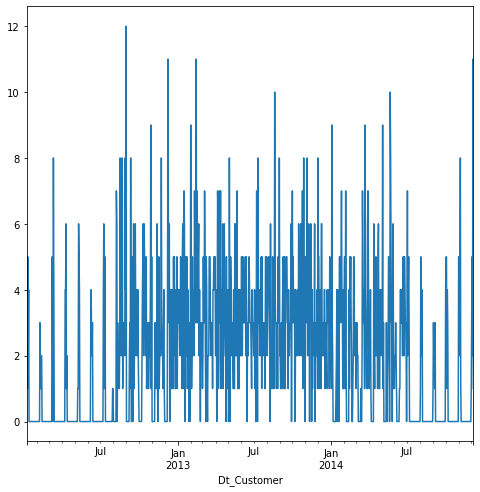

In [ ]:
from statsmodels.tsa.stattools import kpss, adfuller
import matplotlib.pyplot as plt

# Let's take a look at the time-series of number of customers enrolled in different days

# Grouping data by days and count the number of unique users being enrolled
daily_enrollment = df.set_index('Dt_Customer').groupby(pd.Grouper(freq='d')).ID.nunique()
print (daily_enrollment)

# Plot the time-series data
fig = daily_enrollment.plot(figsize=(8,8))
# Can you say which period of time the company was more active to get more customers?
# use either kpss or adf to test the stationarity of this time-series. Is it stationary?
adft = adfuller(daily_enrollment)
test_output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
                               "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                         "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(test_output_df)

**We can see that our data is stationary from the fact that the p-value is smaller than 5% and the test statistic is smaller than the critical value. We can also draw these conclusions from inspecting the data, as we see that the mean is the the same all along.**

## **Question 6: Visualization **

### Part-1: Can you visualize customer's education level and marital status based on their frequency?

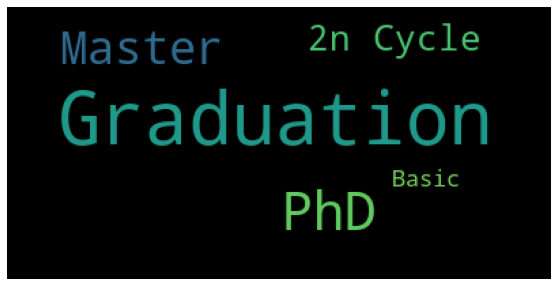

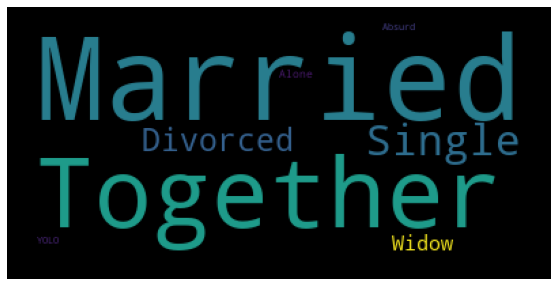

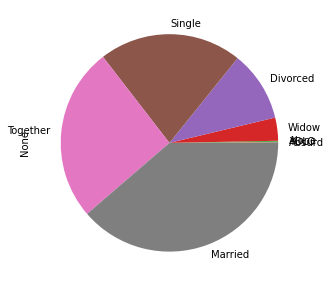

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np 
# Calculate the frequencies for each of the education level and marital status
education_freq = df.groupby("Education").size().sort_values()
marital_status_freq = df.groupby("Marital_Status").size().sort_values()

# Use wordcloud to show the frequency of different education levels among customers
education = education_freq.to_dict()
# Create WordCloud of education levels using their total 
wc_ed = WordCloud()
wc_ed.generate_from_frequencies(education)
# Plot the word cloud
plt.figure(figsize=(12,5))
plt.axis('off')
# Plot the output of WorlCloud which is an image
plt.imshow(wc_ed)
plt.show()

# Create WordCloud of marital status levels using their total 
wc_marital = WordCloud()
wc_marital.generate_from_frequencies(marital_status_freq)
marital_status = marital_status_freq.to_dict()
# Plot the word cloud
plt.figure(figsize=(12,5))
plt.axis('off')
# Plot the output of WorlCloud which is an image
plt.imshow(wc_marital)
plt.show()
# Tell what is the education level of majority of the customers
## >The majority of the customers have Graduated 

# Use pie-chart to show the frequency of different marital status among customers
marital_status_freq.plot.pie(y='Marital_Status', figsize=(5, 5))
# If you don't know how check this: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

# Tell what is the marital status of majority of the customers
## >The majority of the customers are married

**The majority of customers are at graduation level, and the marital status of the majority of customers is married.**

### Part-2 What is the distribution of the customer's income?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


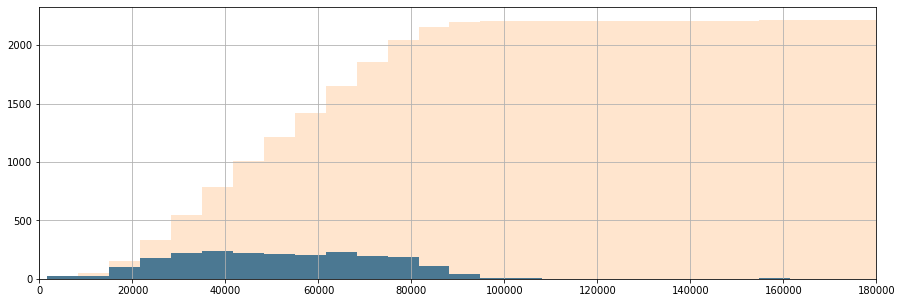

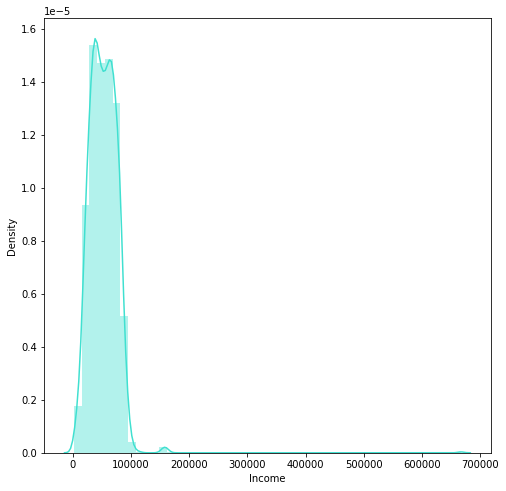

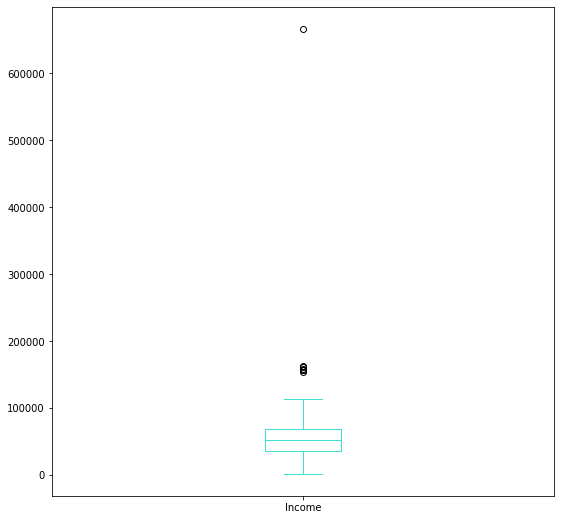

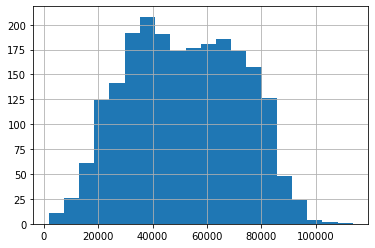

In [ ]:
# Plot the distribution of incomes using `hist` set bins to 100
plt.figure(figsize=(15,5))
df.Income.hist(bins=100)

# Plot the cumulative distribution of incomes using hist and cumulative=1
df.Income.hist(bins=100, cumulative=1, alpha=0.2)

# Remove outliers: incomes which are too big
plt.xlim(0,180000)

# Plot the histogram of filtered incomes
thresh = 120000
filtered_income_df = df.query(f"Income<{thresh}")

#Another way to display income distribution
plt.figure(figsize=(8,8))
sns.distplot(df["Income"],color = 'turquoise')
plt.show()

df["Income"].plot.box(figsize=(9,9),color = 'turquoise')
plt.show()
# How does the distribution looks like?
filtered_income_df.Income.hist(bins=20)
plt.show()

**The majority of incomes is below 100000**

## **Question 7: Clustering **
Can you clustering the customers into segments using different or only selection of features?
- Scale your data 
- Use KMeans to cluster the data
- Try to find the number of clusers
- [OPTIONAL] Can you infer anything out of your results?
- [OPTIONAL] Feel free to apply feature reduction techniques before applying the model
- [OPTIONAL] Feel free to try out other clustering methods

In [ ]:
# Features Preprocessing
# Import
import numpy as np

# Create age from year of birth
df["Age"] = 2021 - df["Year_Birth"]
# Total spendings on various items
df["TotalSpent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + \
                   df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
# Total children living in the household
df["Children"] = df["Kidhome"] + df["Teenhome"]
# Pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
# Deriving living situation by marital status"Alone"
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner",
                                                "Absurd":"Alone", "Widow":"Alone",
                                                "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"
                                                })
# Total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]
# Total number of purchases
df["TotalNumPurchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

print(df.head())

     ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-04-09       58       635  ...              3         11         1   
1  2014-08-03       38        11  ...              3         11         0   
2  2013-08-21       26       426  ...              3         11         0   
3  2014-10-02       26        11  ...              3         11         0   
4  2014-01-19       94       173  ...              3         11         0   

   Age  TotalSpent  Children  Is_Parent  Living_With  Family_Size  \
0   6

<class 'numpy.ndarray'>


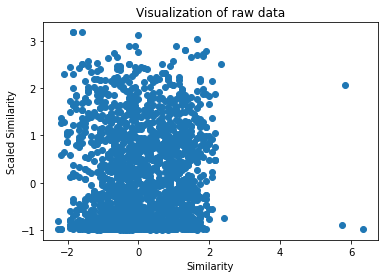

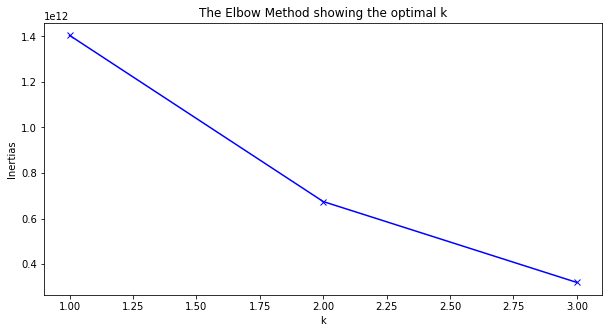

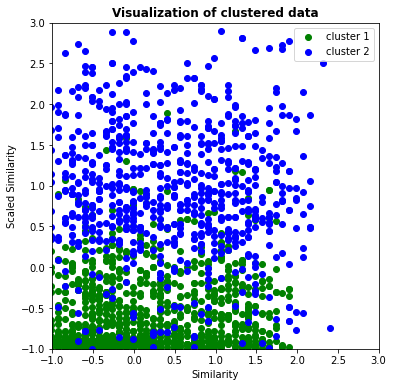

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the feature for training the model
X = df[['Age', 'TotalSpent', 'Children', 'Family_Size', 'Is_Parent', 'Income', 'Recency', 'TotalNumPurchases']]

# Scale your features
X_std = StandardScaler().fit_transform(X)
print(type(X_std))

# Cluster your data
plt.scatter(X_std[:,0], X_std[:,1])
plt.xlabel('Similarity')
plt.ylabel('Scaled Similarity')
plt.title('Visualization of raw data')
plt.show()

# Find the number of clusters
inertias = []
# Setting the ranges of K which we want to test
k_ranges = range(1,4)
for k in k_ranges:
  # Create a KMeans instance with k clusters: model
  model = KMeans(n_clusters=k)
  # Fit model to samples
  model.fit(X)
  # Append the inertia to the list of inertias
  inertias.append(model.inertia_)
# Create a figure
plt.figure(figsize=(10,5))
# Plot inertias per k value
plt.plot(k_ranges, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('The Elbow Method showing the optimal k')
# Show plot
plt.show()

# [OPTIONAL] Interpret the result
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
# Plot data from the first cluster
km = KMeans(n_clusters=2, max_iter=100)\
  .fit(X_std)
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
# Plot data from the second cluster
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.legend()
plt.xlim([-1, 3])
plt.ylim([-1, 3])
plt.xlabel('Similarity')
plt.ylabel('Scaled Similarity')
plt.title('Visualization of clustered data', fontweight='bold')
# Set the aspect ratio of both axis to be equal
ax.set_aspect('equal');